In [68]:
import pandas as pd
import numpy as np
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

In [ ]:
График № 1

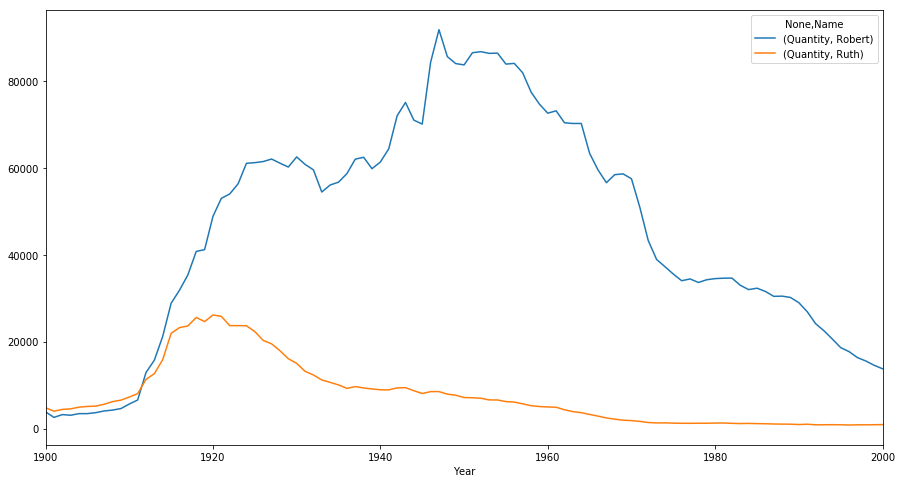

In [73]:
year_start = 1900
year_finish = 2000
list_year = []
list_year = [i for i in range(year_start, year_finish + 1)]
df_list = []
for year in list_year:
    df = pd.read_csv('C:\\Users\\Андрей\\Downloads\\names\\yob' + str(year) + '.txt', 
                           names=['Name', 'Gender', 'Quantity'])
    df['Year'] = year
    df_list.append(df)
df_out = pd.concat(df_list)
name_1 = df_out[df_out['Name'] == 'Robert']
name_2 = df_out[df_out['Name'] == 'Ruth']
names_pd = pd.concat([name_1, name_2]).groupby(['Name', 'Year']).sum()
names_pd.unstack('Name').plot()

In [ ]:
График № 2

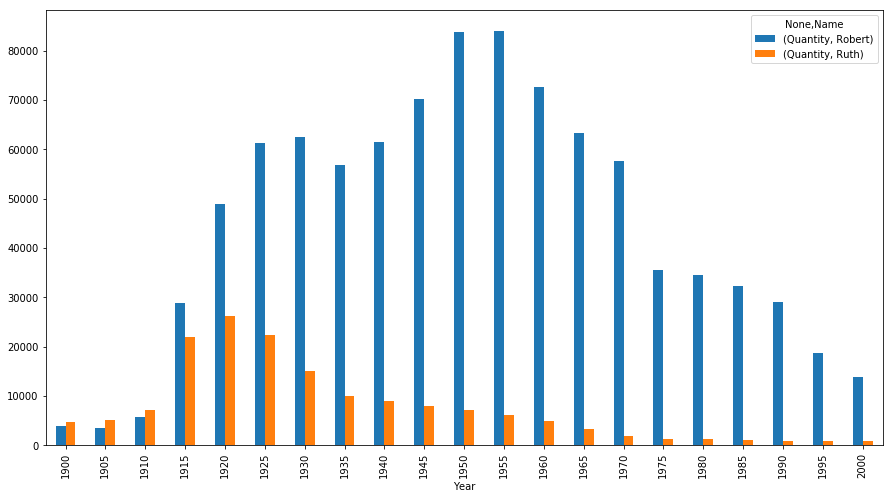

In [74]:
year_start = 1900
year_finish = 2000
list_year = []
list_year = [i for i in range(year_start, year_finish + 1, 5)]
df_list = []
for year in list_year:
    df = pd.read_csv('C:\\Users\\Андрей\\Downloads\\names\\yob' + str(year) + '.txt', 
                           names=['Name', 'Gender', 'Quantity'])
    df['Year'] = year
    df_list.append(df)
df_out = pd.concat(df_list)
name_1 = df_out[df_out['Name'] == 'Robert']
name_2 = df_out[df_out['Name'] == 'Ruth']
names_pd = pd.concat([name_1, name_2]).groupby(['Name', 'Year']).sum()
names_pd.unstack('Name').plot(kind = 'Bar')

In [ ]:
График № 3

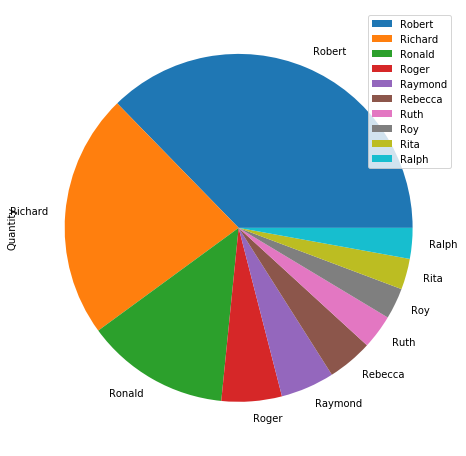

In [77]:
year = 1950
df = pd.read_csv(
    'C:\\Users\\Андрей\\Downloads\\names\\yob' + str(year) + '.txt', 
    names=['Name', 'Gender', 'Quantity']
)
df_name_r = df[df.Name.str.startswith('R')]
name_top_10 = df_name_r.groupby(['Name']).sum().sort_values(by='Quantity', ascending=False).head(10)
name_top_10.plot(kind='pie', y='Quantity')

In [ ]:
График № 4

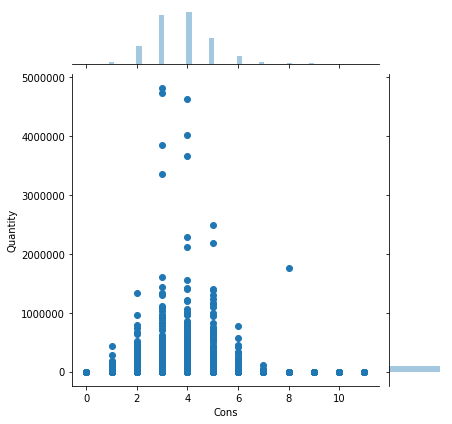

In [123]:
year_start = 1900
year_finish = 2000
list_year = []
list_year = [i for i in range(year_start, year_finish + 1)]
df_list = []
consonants = 'bcdfghjklmnpqrstvwxyz'
for year in list_year:
    df = pd.read_csv('C:\\Users\\Андрей\\Downloads\\names\\yob' + str(year) + '.txt', 
                           names=['Name', 'Gender', 'Quantity'])
    df['Year'] = year
    df_list.append(df)
df_out = pd.concat(df_list, ignore_index=True)
name_list = df_out.groupby(['Name']).sum()
name_list['Cons'] = 1

for x in range(len(name_list.index)):
    cons = len(re.findall(r'[bcdfghjklmnpqrstvwxyz]', name_list.index[x], re.IGNORECASE))
    name_list.loc[name_list.index[x], 'Cons'] = cons

sns.jointplot(x='Cons', y='Quantity', 
              data=name_list, kind='scatter')
